<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E6%97%A5%E5%BF%97%E5%A4%84%E7%90%8610_7%E5%87%8C%E6%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install drain3


In [3]:
import pandas as pd
from drain3 import TemplateMiner

# 读取日志文件
log_data = pd.read_csv('anomalous_logs.csv')
logs = log_data['log'].tolist()  # 假设日志文件中的日志消息位于名为 'message' 的列中

# 配置和初始化 TemplateMiner
template_miner = TemplateMiner()





In [5]:
log_data

,log
0,1118709461 2005.06.13 R17-M0-ND-C:J08-U11 2005...
1,1118709550 2005.06.13 R03-M1-NF-C:J03-U01 2005...
2,1132111112 2005.11.15 R56-M0-NF-C:J07-U11 2005...
3,1124172595 2005.08.15 R61-M0-N0-C:J12-U11 2005...
4,1118767917 2005.06.14 R11-M1-N9-C:J11-U11 2005...
...,...
2393,1125734928 2005.09.03 R22-M1-N8-I:J18-U11 2005...
2394,1123915752 2005.08.12 R56-M1-N0-I:J18-U01 2005...
2395,1125552566 2005.08.31 R51-M0-N0-I:J18-U01 2005...
2396,1132021526 2005.11.14 R46-M1-N9-C:J08-U11 2005...


log_data

In [4]:
# 用于存储模板的列表
templates = []

# 处理日志
for log in logs:
    result = template_miner.add_log_message(log)
    if result is not None and 'change_type' in result and result['change_type'] == "TEMPLATE_ADD":
        templates.append(result['template_mined'])

# 将模板保存到 DataFrame 中
df_templates = pd.DataFrame(templates, columns=["Log Templates"])

# 保存到 CSV 文件中
df_templates.to_csv('templates.csv', index=False)

In [6]:
df_templates

,Log Templates


In [7]:
import pandas as pd
from drain3 import TemplateMiner

# 读取日志文件
log_data = pd.read_csv('anomalous_logs.csv')
logs = log_data['log'].tolist()  # 使用正确的列名

# 配置和初始化 TemplateMiner
template_miner = TemplateMiner()

# 用于存储模板的列表
templates = []

# 处理日志
for log in logs:
    result = template_miner.add_log_message(log)
    if result is not None and 'change_type' in result and result['change_type'] == "TEMPLATE_ADD":
        templates.append(result['template_mined'])

# 将模板保存到 DataFrame 中
df_templates = pd.DataFrame(templates, columns=["Log Templates"])

# 保存到 CSV 文件中
df_templates.to_csv('templates_corrected2.csv', index=False)


In [10]:
import pandas as pd
from drain3 import TemplateMiner

# 读取日志文件
log_data = pd.read_csv('anomalous_logs.csv')
logs = log_data['log'].tolist()

# 配置和初始化 TemplateMiner
template_miner = TemplateMiner()

# 用于存储模板的列表
templates = []

# 处理日志并输出 Drain3 的返回结果
for log in logs:
    result = template_miner.add_log_message(log)
    print(result)  # 输出每次处理的结果
    if result is not None and 'change_type' in result and result['change_type'] == "TEMPLATE_ADD":
        templates.append(result['template_mined'])

# 将模板保存到 DataFrame 中
df_templates = pd.DataFrame(templates, columns=["Log Templates"])

# 保存到 CSV 文件中
df_templates.to_csv('templates_corrected.csv', index=False)




{'change_type': 'cluster_created', 'cluster_id': 1, 'cluster_size': 1, 'template_mined': '1118709461 2005.06.13 R17-M0-ND-C:J08-U11 2005-06-13-17.37.41.233866 R17-M0-ND-C:J08-U11 RAS KERNEL FATAL data storage interrupt', 'cluster_count': 1}
{'change_type': 'cluster_template_changed', 'cluster_id': 1, 'cluster_size': 2, 'template_mined': '<*> 2005.06.13 <*> <*> <*> RAS KERNEL FATAL data storage interrupt', 'cluster_count': 1}
{'change_type': 'cluster_created', 'cluster_id': 2, 'cluster_size': 1, 'template_mined': '1132111112 2005.11.15 R56-M0-NF-C:J07-U11 2005-11-15-19.18.32.129894 R56-M0-NF-C:J07-U11 RAS KERNEL FATAL rts: kernel terminated for reason 1004', 'cluster_count': 2}
{'change_type': 'cluster_template_changed', 'cluster_id': 2, 'cluster_size': 2, 'template_mined': '<*> <*> <*> <*> <*> RAS KERNEL FATAL rts: kernel terminated for reason <*>', 'cluster_count': 2}
{'change_type': 'cluster_template_changed', 'cluster_id': 1, 'cluster_size': 3, 'template_mined': '<*> <*> <*> <*> <*>

In [11]:
import pandas as pd
from drain3 import TemplateMiner

# 读取日志文件
log_data = pd.read_csv('anomalous_logs.csv')
logs = log_data['log'].tolist()

# 配置和初始化 TemplateMiner
template_miner = TemplateMiner()

# 用于存储模板的列表
templates = set()  # 使用集合来确保模板的唯一性

# 处理日志并输出 Drain3 的返回结果
for log in logs:
    result = template_miner.add_log_message(log)
    if result is not None:
        if result['change_type'] in ["TEMPLATE_ADD", "cluster_template_changed"]:
            templates.add(result['template_mined'])

# 将模板保存到 DataFrame 中
df_templates = pd.DataFrame(list(templates), columns=["Log Templates"])

# 保存到 CSV 文件中
df_templates.to_csv('templates_corrected.csv', index=False)


In [12]:
df_templates


,Log Templates
0,<*> <*> <*> <*> <*> RAS APP FATAL ciod: Error ...
1,<*> <*> <*> <*> <*> RAS KERNEL FATAL rts: kern...
2,<*> <*> NULL <*> NULL RAS KERNEL FATAL Power d...
3,<*> 2005.08.05 <*> <*> <*> RAS KERNEL FATAL Er...
4,<*> <*> <*> <*> <*> RAS APP FATAL ciod: Error ...
5,<*> <*> <*> <*> <*> RAS KERNEL FATAL Error rec...
6,<*> <*> <*> <*> <*> RAS KERNEL FATAL Error: un...
7,<*> 2005.11.21 <*> <*> <*> RAS APP FATAL ciod:...
8,<*> <*> <*> <*> <*> RAS KERNEL FATAL Microload...
9,<*> <*> <*> <*> <*> RAS KERNEL FATAL Lustre mo...


In [13]:
!pip install fasttext

  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=8dd3b71e5ae928249eb1ccf42eeef5ed4da2207189ff38cbc8f1b61e83c88bdd
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
# Import necessary libraries
import pandas as pd
import re
import fasttext.util

# Load the anomalous_logs.csv file
anomalous_logs_df = pd.read_csv('anomalous_logs.csv')

# Split each log into words/tokens
anomalous_logs_df["tokens"] = anomalous_logs_df["log"].str.split()

# Clean the tokens
def clean_tokens(tokens):
    """
    Clean the tokens by removing special characters and punctuations.
    """
    cleaned = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    return [token for token in cleaned if token]

anomalous_logs_df["cleaned_tokens"] = anomalous_logs_df["tokens"].apply(clean_tokens)

# Download and load FastText model
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

# Get embeddings for cleaned tokens
def get_embedding(tokens):
    # Averaging embeddings of all tokens for a log
    embeddings = [ft.get_word_vector(token) for token in tokens]
    return sum(embeddings) / len(embeddings) if embeddings else []

anomalous_logs_df["embeddings"] = anomalous_logs_df["cleaned_tokens"].apply(get_embedding)

# You can save or check the processed dataframe as needed
anomalous_logs_df.head()


In [3]:
anomalous_logs_df.head()


,log,tokens,cleaned_tokens,embeddings
0,1118709461 2005.06.13 R17-M0-ND-C:J08-U11 2005...,"[1118709461, 2005.06.13, R17-M0-ND-C:J08-U11, ...","[1118709461, 20050613, R17M0NDCJ08U11, 2005061...","[0.0029109267, -0.02086202, 0.0035663983, 0.03..."
1,1118709550 2005.06.13 R03-M1-NF-C:J03-U01 2005...,"[1118709550, 2005.06.13, R03-M1-NF-C:J03-U01, ...","[1118709550, 20050613, R03M1NFCJ03U01, 2005061...","[0.0027015822, -0.01868384, 0.008998021, 0.029..."
2,1132111112 2005.11.15 R56-M0-NF-C:J07-U11 2005...,"[1132111112, 2005.11.15, R56-M0-NF-C:J07-U11, ...","[1132111112, 20051115, R56M0NFCJ07U11, 2005111...","[0.013881872, -0.018303763, 0.01007088, 0.0136..."
3,1124172595 2005.08.15 R61-M0-N0-C:J12-U11 2005...,"[1124172595, 2005.08.15, R61-M0-N0-C:J12-U11, ...","[1124172595, 20050815, R61M0N0CJ12U11, 2005081...","[-0.0008783835, -0.030539172, -0.011874484, 0...."
4,1118767917 2005.06.14 R11-M1-N9-C:J11-U11 2005...,"[1118767917, 2005.06.14, R11-M1-N9-C:J11-U11, ...","[1118767917, 20050614, R11M1N9CJ11U11, 2005061...","[0.00457612, -0.017892439, 0.011905307, 0.0311..."


In [4]:
# Save the processed dataframe to a CSV file
anomalous_logs_df.to_csv('processed_logs.csv', index=False)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the autoencoder using PyTorch
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid()  # We use sigmoid since embeddings are normalized between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_size = len(anomalous_logs_df["embeddings"].iloc[0])
autoencoder = Autoencoder(input_size)

# Display the model architecture
print(autoencoder)


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=300, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=300, bias=True)
    (5): Sigmoid()
  )
)


In [6]:
# 1. Data Preparation

# Convert embeddings to PyTorch tensors
embeddings = torch.tensor([embedding for embedding in anomalous_logs_df["embeddings"].values]).float()

# Create dataloaders
batch_size = 256
dataset = torch.utils.data.TensorDataset(embeddings, embeddings)  # Input and target are the same for autoencoders
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 2. Model Configuration

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# 3. Training Process

num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(dataloader):
        # Forward pass
        outputs = autoencoder(data)
        loss = criterion(outputs, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training finished.")


<ipython-input-6-d2e59c4f9727>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  embeddings = torch.tensor([embedding for embedding in anomalous_logs_df["embeddings"].values]).float()


Epoch [1/10], Loss: 0.2309
Epoch [2/10], Loss: 0.1878
Epoch [3/10], Loss: 0.0886
Epoch [4/10], Loss: 0.0035
Epoch [5/10], Loss: 0.0010
Epoch [6/10], Loss: 0.0010
Epoch [7/10], Loss: 0.0010
Epoch [8/10], Loss: 0.0010
Epoch [9/10], Loss: 0.0010
Epoch [10/10], Loss: 0.0010
Training finished.


In [7]:
# Extract encoder part of the autoencoder
encoder_model = nn.Sequential(*list(autoencoder.children())[:-1])

# Encode the embeddings to get the compressed feature representation
encoded_features = encoder_model(embeddings).detach().numpy()

# Display the shape of the encoded features
encoded_features.shape


(2398, 32)

In [8]:
from sklearn.cluster import KMeans

# Determine the number of clusters
# A common heuristic is to use the square root of half the number of data points
n_clusters = int((len(encoded_features) / 2) ** 0.5)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_features)

# Display the distribution of logs across clusters
cluster_distribution = pd.Series(cluster_labels).value_counts()
cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22    232
0     209
7     208
28    113
16    103
27    100
21     97
3      97
4      94
1      83
20     81
15     79
10     76
31     67
12     66
26     65
11     62
9      60
23     60
25     59
24     56
2      56
6      52
33     42
5      37
18     34
14     34
32     28
29     17
19     13
13     12
17      3
30      2
8       1
dtype: int64

In [9]:
def extract_template_from_cluster(cluster_center, reference_log_tokens):
    """
    Extract a log template from the cluster center based on a reference log.
    """
    threshold = 0.5  # A threshold to determine if a token should be considered as a wildcard or not
    template = []

    # Compare each dimension of the cluster center with the reference log's embedding
    for center_value, ref_token in zip(cluster_center, reference_log_tokens):
        if abs(center_value) > threshold:
            template.append(ref_token)
        else:
            template.append("<*>")

    return " ".join(template)

# Extract templates for each cluster
templates = []
for cluster_idx in range(n_clusters):
    # Find a reference log from the cluster
    reference_log_index = next(i for i, label in enumerate(cluster_labels) if label == cluster_idx)
    reference_log_tokens = anomalous_logs_df["cleaned_tokens"].iloc[reference_log_index]

    # Extract template based on the cluster's center and the reference log
    template = extract_template_from_cluster(kmeans.cluster_centers_[cluster_idx], reference_log_tokens)
    templates.append(template)

# Display the first few extracted templates
templates[:10]


['1118544889 20050611 <*> 20050611195449560340 <*> RAS KERNEL <*> data TLB error interrupt',
 '1132111112 20051115 <*> 20051115191832129894 <*> RAS KERNEL <*> rts kernel terminated for reason <*>',
 '1118765573 20050614 <*> 20050614091253870620 <*> RAS KERNEL <*> data storage interrupt',
 '1134357692 20051211 <*> 20051211192132571742 <*> RAS <*> <*> ciod Error reading message <*> <*> LOGINMESSAGE <*> CioStream <*> to <*> <*> has <*> severed',
 '1132940722 20051125 <*> 20051125094522032467 <*> RAS APP <*> ciod Error reading message prefix <*> CioStream <*> to <*> Link <*> <*> severed',
 '1130529608 20051028 <*> 20051028130008657423 <*> RAS <*> <*> Error receiving packet on <*> <*> expecting <*> 57 <*> <*> <*> <*> softheader0064588e <*> 00000002 00000000 <*> PSR100000000 <*> PIXF00000007',
 '1125781704 20050903 <*> 20050903140824234036 <*> RAS KERNEL <*> Lustre mount FAILED bglio665 point <*>',
 '1118550532 20050611 <*> 20050611212852090235 <*> RAS KERNEL <*> data TLB error interrupt',
 

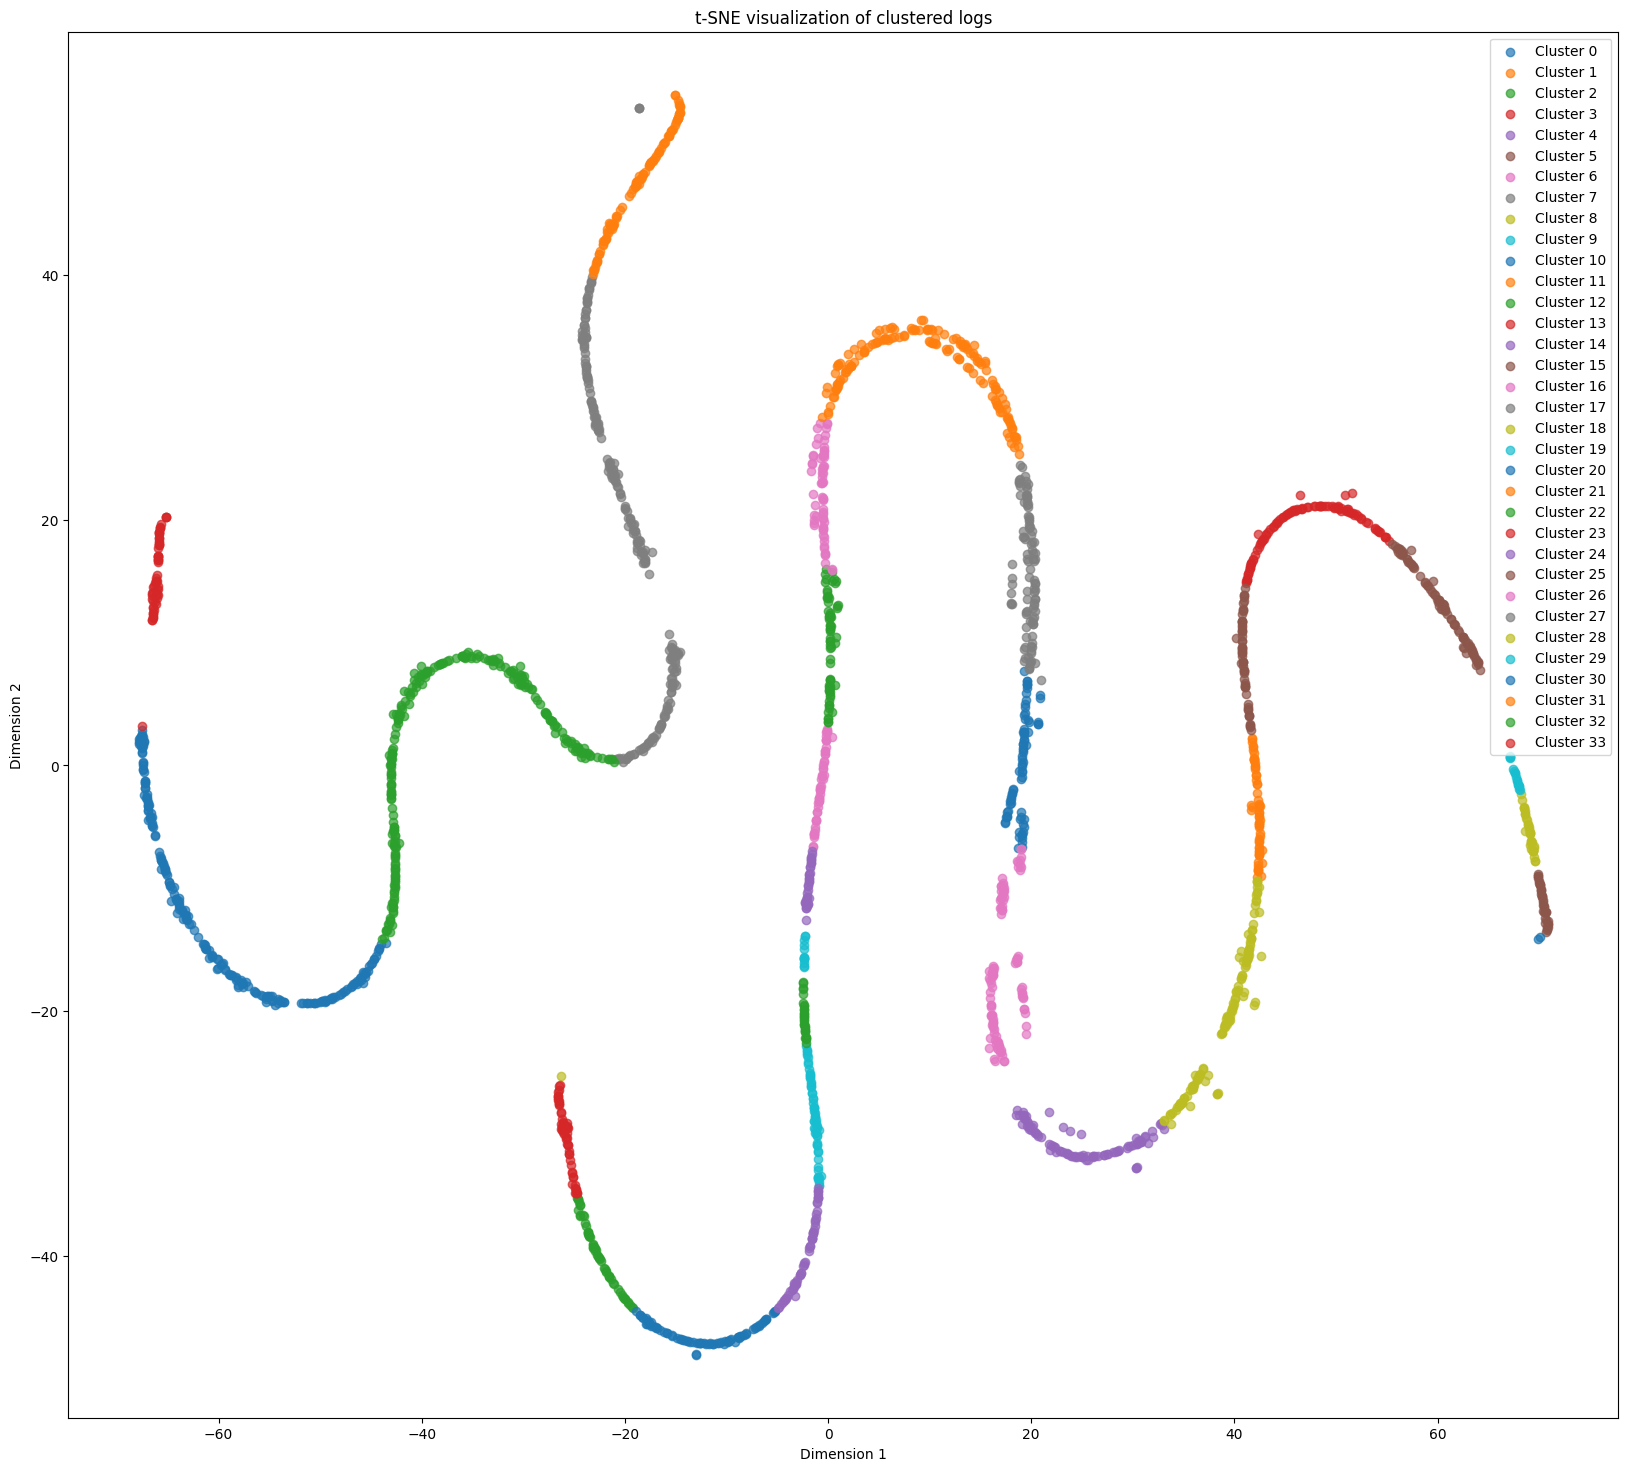

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Use t-SNE to reduce dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(encoded_features)

# Plot the t-SNE reduced features colored by cluster labels
plt.figure(figsize=(20, 18))
for cluster_idx in range(n_clusters):
    cluster_data = reduced_features[cluster_labels == cluster_idx]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_idx}", alpha=0.7)

plt.title("t-SNE visualization of clustered logs")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()
